In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
sns.set()

In [2]:
data = pd.read_csv('FIFA 2018 Statistics.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
Date                      128 non-null object
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-nul

In [3]:
data_c = data[(data['Team'] == 'France') | (data['Team'] == 'Australia') | (data['Team'] == 'Peru') | (data['Team'] == 'Denmark')]
data_c.sort_values('Team', inplace=True)
cg = data_c[data_c['Round'] == 'Group Stage']
cg

C:\Users\keita_moriyama\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
9,16-06-2018,Australia,France,1,49,4,1,2,1,1,...,3,0,0,No,62.0,Group Stage,No,0,1.0,81.0
41,21-06-2018,Australia,Denmark,1,51,14,5,5,4,5,...,0,0,0,No,38.0,Group Stage,No,0,NaN,NaN
74,26-06-2018,Australia,Peru,0,53,14,2,7,5,8,...,4,0,0,No,NaN,Group Stage,No,0,NaN,NaN
72,26-06-2018,Denmark,France,0,38,5,1,2,2,4,...,1,0,0,No,NaN,Group Stage,No,0,NaN,NaN
13,16-06-2018,Denmark,Peru,1,48,10,3,5,2,7,...,2,0,0,Yes,59.0,Group Stage,No,0,NaN,NaN
40,21-06-2018,Denmark,Australia,1,49,10,5,5,0,3,...,2,0,0,Yes,7.0,Group Stage,No,0,NaN,NaN
8,16-06-2018,France,Australia,2,51,12,5,4,3,5,...,1,0,0,Yes,58.0,Group Stage,No,0,NaN,NaN
42,21-06-2018,France,Peru,1,44,12,4,6,2,5,...,2,0,0,Yes,34.0,Group Stage,No,0,NaN,NaN
73,26-06-2018,France,Denmark,0,62,11,4,6,1,2,...,0,0,0,Yes,NaN,Group Stage,No,0,NaN,NaN
75,26-06-2018,Peru,Australia,2,47,4,3,1,0,3,...,2,0,0,Yes,18.0,Group Stage,No,0,NaN,NaN


In [4]:
# GroupC各チームの平均データ
Australia = cg[cg['Team'] == 'Australia']
Denmark = cg[cg['Team'] == 'Denmark']
France = cg[cg['Team'] == 'France']
Peru = cg[cg['Team'] == 'Peru']
n1 = np.array(cg.mean().index)
t1 = np.array(cg.mean())
a1 = np.array(Australia.mean())
d1 = np.array(Denmark.mean())
f1 = np.array(France.mean())
p1 = np.array(Peru.mean())
ave_data = pd.DataFrame()
ave_data['features'] = n1
ave_data['France'] = f1
ave_data['Denmark'] = d1
ave_data['Peru'] = p1
ave_data['Australia'] = a1
ave_data['total'] = t1
ave_data

,features,France,Denmark,Peru,Australia,total
0,Goal Scored,1.000000,0.666667,0.666667,0.666667,0.750000
1,Ball Possession %,52.333333,45.000000,51.666667,51.000000,50.000000
2,Attempts,11.666667,8.333333,10.666667,10.666667,10.333333
3,On-Target,4.333333,3.000000,3.666667,2.666667,3.416667
4,Off-Target,5.333333,4.000000,4.666667,4.666667,4.666667
5,Blocked,2.000000,1.333333,2.333333,3.333333,2.250000
6,Corners,4.000000,4.666667,3.000000,4.666667,4.083333
7,Offsides,0.333333,1.666667,2.333333,1.000000,1.333333
8,Free Kicks,15.333333,10.333333,16.000000,12.333333,13.500000
9,Saves,1.333333,4.666667,2.333333,3.333333,2.916667


In [5]:
# 失点を計算
pre = cg[['Opponent', 'Goal Scored']]
pre.rename(columns={'Opponent': 'Team', 'Goal Scored': 'Lose Scores'}, inplace=True)
cg2 = pd.merge(cg, pre, how='left', on='Team')
cg2

C:\Users\keita_moriyama\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,Lose Scores
0,16-06-2018,Australia,France,1,49,4,1,2,1,1,...,0,0,No,62.0,Group Stage,No,0,1.0,81.0,1
1,16-06-2018,Australia,France,1,49,4,1,2,1,1,...,0,0,No,62.0,Group Stage,No,0,1.0,81.0,2
2,16-06-2018,Australia,France,1,49,4,1,2,1,1,...,0,0,No,62.0,Group Stage,No,0,1.0,81.0,2
3,21-06-2018,Australia,Denmark,1,51,14,5,5,4,5,...,0,0,No,38.0,Group Stage,No,0,NaN,NaN,1
4,21-06-2018,Australia,Denmark,1,51,14,5,5,4,5,...,0,0,No,38.0,Group Stage,No,0,NaN,NaN,2
5,21-06-2018,Australia,Denmark,1,51,14,5,5,4,5,...,0,0,No,38.0,Group Stage,No,0,NaN,NaN,2
6,26-06-2018,Australia,Peru,0,53,14,2,7,5,8,...,0,0,No,NaN,Group Stage,No,0,NaN,NaN,1
7,26-06-2018,Australia,Peru,0,53,14,2,7,5,8,...,0,0,No,NaN,Group Stage,No,0,NaN,NaN,2
8,26-06-2018,Australia,Peru,0,53,14,2,7,5,8,...,0,0,No,NaN,Group Stage,No,0,NaN,NaN,2
9,26-06-2018,Denmark,France,0,38,5,1,2,2,4,...,0,0,No,NaN,Group Stage,No,0,NaN,NaN,1


In [6]:
# GroupC平均データに失点データを追加
Australia = cg2[cg2['Team'] == 'Australia']
Denmark = cg2[cg2['Team'] == 'Denmark']
France = cg2[cg2['Team'] == 'France']
Peru = cg2[cg2['Team'] == 'Peru']
n2 = np.array(cg2.mean().index)
t2 = np.array(cg2.mean())
a2 = np.array(Australia.mean())
d2 = np.array(Denmark.mean())
f2 = np.array(France.mean())
p2 = np.array(Peru.mean())
ave_data2 = pd.DataFrame()
ave_data2['features'] = n2
ave_data2['France'] = f2
ave_data2['Denmark'] = d2
ave_data2['Peru'] = p2
ave_data2['Australia'] = a2
ave_data2['total'] = t2
ave_data2

,features,France,Denmark,Peru,Australia,total
0,Goal Scored,1.000000,0.666667,0.666667,0.666667,0.750000
1,Ball Possession %,52.333333,45.000000,51.666667,51.000000,50.000000
2,Attempts,11.666667,8.333333,10.666667,10.666667,10.333333
3,On-Target,4.333333,3.000000,3.666667,2.666667,3.416667
4,Off-Target,5.333333,4.000000,4.666667,4.666667,4.666667
5,Blocked,2.000000,1.333333,2.333333,3.333333,2.250000
6,Corners,4.000000,4.666667,3.000000,4.666667,4.083333
7,Offsides,0.333333,1.666667,2.333333,1.000000,1.333333
8,Free Kicks,15.333333,10.333333,16.000000,12.333333,13.500000
9,Saves,1.333333,4.666667,2.333333,3.333333,2.916667


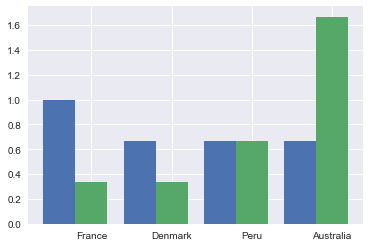

In [28]:
# 得点数と失点数を可視化

fd1 = ave_data2[(ave_data2['features'] == 'Goal Scored') | (ave_data2['features'] == 'Lose Scores')]
country = np.array(['France', 'Denmark', 'Peru', 'Australia'])
g_score = np.array(fd1.iloc[0, 1:5])
l_score = np.array(fd1.iloc[1, 1:5])
fig1 = pd.DataFrame()
fig1['Team'] = country
fig1['Goal_Scored'] = g_score
fig1['Lose_Scores'] = l_score
x = np.arange(len(fig1['Team']))
w = 0.4

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x, fig1['Goal_Scored'], tick_label=fig1['Team'], width=w)
ax.bar(x+w, fig1['Lose_Scores'], tick_label=fig1['Team'], width=w)

plt.show()

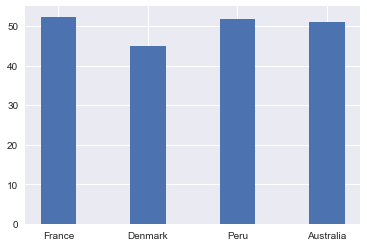

In [37]:
# ボールポゼッションを可視化

fd2 = ave_data2[ave_data2['features'] == 'Ball Possession %']
country = np.array(['France', 'Denmark', 'Peru', 'Australia'])
g_score = np.array(fd2.iloc[0, 1:5])
fig2 = pd.DataFrame()
fig2['Team'] = country
fig2['Goal_Scored'] = g_score
x = np.arange(len(fig2['Team']))
w = 0.4

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x, fig2['Goal_Scored'], tick_label=fig2['Team'], width=w)
plt.show()

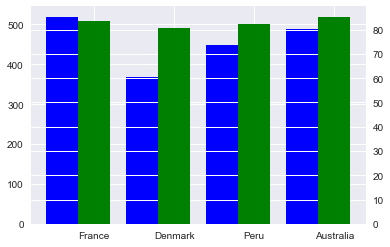

In [36]:
# パス本数と成功率を可視化

fd3 = ave_data2[(ave_data2['features'] == 'Passes') | (ave_data2['features'] == 'Pass Accuracy %')]
country = np.array(['France', 'Denmark', 'Peru', 'Australia'])
g_score = np.array(fd3.iloc[1, 1:5])
l_score = np.array(fd3.iloc[0, 1:5])
fig3 = pd.DataFrame()
fig3['Team'] = country
fig3['Passes'] = g_score
fig3['Pass Accuracy %'] = l_score
x = np.arange(len(fig3['Team']))
w = 0.4

fig = plt.figure()
ax = fig.add_subplot(111)
ax1 = ax.twinx()
ax.bar(x, fig3['Passes'], tick_label=fig3['Team'], width=w, color='b')
ax1.bar(x+w, fig3['Pass Accuracy %'], tick_label=fig3['Team'], width=w, color='g')

plt.show()

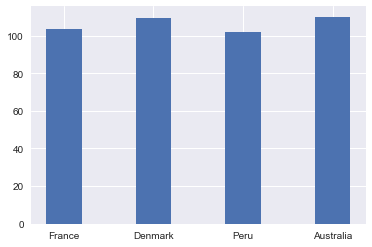

In [38]:
# ボールポゼッションを可視化

fd2 = ave_data2[ave_data2['features'] == 'Distance Covered (Kms)']
country = np.array(['France', 'Denmark', 'Peru', 'Australia'])
g_score = np.array(fd2.iloc[0, 1:5])
fig2 = pd.DataFrame()
fig2['Team'] = country
fig2['Distance Covered (Kms)'] = g_score
x = np.arange(len(fig2['Team']))
w = 0.4

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x, fig2['Distance Covered (Kms)'], tick_label=fig2['Team'], width=w)
plt.show()